Creación Lista

In [1]:
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"}
]

 1. Definir las conexiones (amistades)

In [2]:
friendships = {
    0: [1, 2],
    1: [0, 2, 3],
    2: [0, 1, 3],
    3: [1, 2, 4],
    4: [3, 5],
    5: [4, 6, 7],
    6: [5, 8],
    7: [5, 8],
    8: [6, 7, 9],
    9: [8]
}

2. Añadir las conexiones a cada usuario
Agregaremos una clave "friends" a cada usuario en users para tener toda la información en un solo lugar.

In [3]:
for user in users:
    user["friends"] = friendships.get(user["id"], [])

🔹 3. Funciones útiles para agrupaciones
a Encontrar amigos de un usuario

In [4]:
def get_friends(user_id):
    return [user for user in users if user["id"] in friendships.get(user_id, [])]

b Contar conexiones (popularidad)

In [5]:
def count_friends(user_id):
    return len(friendships.get(user_id, []))

c Encontrar amigos en común entre dos usuarios

In [6]:
def common_friends(user1_id, user2_id):
    friends1 = set(friendships.get(user1_id, []))
    friends2 = set(friendships.get(user2_id, []))
    return list(friends1 & friends2)

🔹 4. Detectar comunidades (grupos conectados)
Usaremos BFS (Breadth-First Search) para encontrar componentes conectados (comunidades).

In [7]:
from collections import deque

def find_communities():
    visited = set()
    communities = []

    for user in users:
        if user["id"] not in visited:
            queue = deque([user["id"]])
            community = []
            while queue:
                current_id = queue.popleft()
                if current_id not in visited:
                    visited.add(current_id)
                    community.append(current_id)
                    for friend_id in friendships.get(current_id, []):
                        if friend_id not in visited:
                            queue.append(friend_id)
            communities.append(community)
    return communities

communities = find_communities()
print("Comunidades:", communities)

Comunidades: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]


🔹 5. Recomendación de amigos (sugerir conexiones)
Basado en amigos en común (como LinkedIn o Facebook):

In [8]:
def suggest_friends(user_id):
    suggestions = {}  # Diccionario para almacenar sugerencias y sus conteos
    for friend_id in friendships.get(user_id, []):  # 1. Recorre amigos directos del usuario
        for friend_of_friend in friendships.get(friend_id, []):  # 2. Recorre amigos de cada amigo
            if (friend_of_friend != user_id and  # 3. Verifica que no sea el propio usuario
                friend_of_friend not in friendships.get(user_id, [])):  # 4. Verifica que no sea ya amigo
                suggestions[friend_of_friend] = suggestions.get(friend_of_friend, 0) + 1  # 5. Actualiza conteo
    return sorted(suggestions.keys(), key=lambda x: suggestions[x], reverse=True)  # 6. Ordena por frecuencia

print("Sugerencias para el usuario 0:", suggest_friends(0))

Sugerencias para el usuario 0: [3]


🔹 6. Visualización (usando networkx y matplotlib)

In [9]:
pip install networkx matplotlib

Note: you may need to restart the kernel to use updated packages.


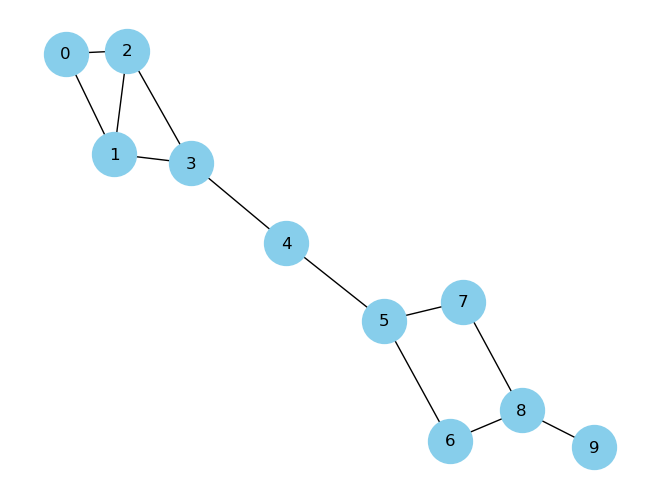

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for user in users:
    G.add_node(user["id"], name=user["name"])
for user_id, friends in friendships.items():
    for friend_id in friends:
        G.add_edge(user_id, friend_id)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=1000)
plt.show()